# testing

In [4]:
import os,sys,time,glob,math
from importlib import reload
import subprocess
from collections import OrderedDict
import numpy as np
import pandas as pd
pd.set_option('display.width', 120)
pd.set_option('max_colwidth', 80)
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import epitopepredict as ep
from epitopepredict import base, sequtils, peptutils, utilities, tepitope, web, plotting, mhclearn

In [5]:
print (base.predictors)

['basicmhc1', 'tepitope', 'netmhciipan', 'netmhcpan', 'mhcflurry', 'mhcnuggets', 'iedbmhc1', 'iedbmhc2']


In [6]:
seqs = ['MRRVILPTAPPEYMEAIYPVRSNSTIARGGNSNTGFLTPESVNGDTPSNPLRPIADDTIDHASHTPGSVSSA',
         'FILEAMVNVISGPKVLMKQIPIWLPLGVADQKTYSFDSTTAAIMLASYTITHFGKATNPLVRVNRLGPGIPDHP',
         'LRLLRIGNQAFLQEFVLPPVQLPQYFTFDLTALKLITQPLPAATWTDDTPTGSNGALRPGISFHPKLRPILLPN',
         'KSGKKGNSADLTSPEKIQAIMTSLQDFKIVPIDPTKNIMGIEVPETLVHKLTGKKVTSKNGQPIIPVLLPKYIGL',
         'DPVAPGDLTMVITQDCDTCHSPASLPAVIEK']
#prots=sequtils.fasta_to_dataframe('../tempseq.fa')
prots = sequtils.genbank_to_dataframe('../MTB-H37Rv.gb',cds=True)
seqs = peptutils.create_random_sequences(5000)
m2alleles = base.get_preset_alleles('mhc2_supertypes')
m1alleles = base.get_preset_alleles('mhc1_supertypes')

In [7]:
reload(base)
for p in base.predictors:
    P=base.get_predictor(p)
    print (P)
    x=P.get_alleles()[:6]
    print (p,x)

basicmhc1 predictor
basicmhc1 ['HLA-A*02:01', 'HLA-A*02:03', 'HLA-A*02:06', 'HLA-A*03:01', 'HLA-A*68:02', 'HLA-A*11:01']
tepitope predictor
tepitope ['HLA-DRB1*1601', 'HLA-DRB1*0101', 'HLA-DRB1*0102', 'HLA-DRB1*0103', 'HLA-DRB1*0104', 'HLA-DRB1*0105']
netmhciipan predictor
netmhciipan ['DRB1_0101', 'DRB1_0102', 'DRB1_0103', 'DRB1_0104', 'DRB1_0105', 'DRB1_0106']
netmhcpan predictor
netmhcpan ['BoLA-100901', 'BoLA-100902', 'BoLA-101901', 'BoLA-102001', 'BoLA-102101', 'BoLA-102301']
mhcflurry predictor
mhcflurry ['BoLA-6*13:01', 'Eqca-1*01:01', 'H-2-Db', 'H-2-Dd', 'H-2-Kb', 'H-2-Kd']
mhcnuggets predictor
mhcnuggets ['BoLA-208:01', 'BoLA-212:01', 'BoLA-613:01', 'BoLA-641:01', 'BoLA-A11:01', 'BoLA-DRB302:01']
iedbmhc1 predictor
iedbmhc1 ['BoLA-AW10', 'BoLA-D18.4', 'BoLA-HD6', 'BoLA-JSP.1', 'BoLA-T2C', 'BoLA-T2a']
iedbmhc2 predictor
iedbmhc2 ['H2-IAb', 'H2-IAd', 'HLA-DPA1*01/DPB1*04:01', 'HLA-DPA1*01:03/DPB1*02:01', 'HLA-DPA1*02:01/DPB1*01:01', 'HLA-DPA1*02:01/DPB1*05:01']


In [ ]:
reload(base)
reload(sequtils)

def benchmark_cpus(P, seqs, alleles, c=5):
    procs=range(1,c)
    tt=[]
    for c in procs:
        st=time.time()
        P.predict_peptides(seqs, alleles=alleles, cpus=c)
        #P.predictProteins(prots[:20], alleles=m2alleles, cpus=c)
        t=time.time()-st
        tt.append(t)
    plt.plot(procs,tt)
    plt.xlabel('cpus')
    
def benchmark_seqs(P, seqs, alleles, n=4):
    tt=[]
    n=len(seqs)/n
    x=range(n,len(seqs)+1,n)
    print n,x
    for i in x:
        s=seqs[:i]        
        st=time.time()
        P.predict_peptides(s, alleles=alleles)
        #P.predictProteins(s, alleles=m2alleles, cpus=c)
        t=time.time()-st
        tt.append(t)
    print ([i[1]/i[0] for i in zip(x,tt)])
    plt.plot(x,tt)
    plt.xlabel('peptides')
    plt.ylabel('time')


### basic tests MHC-I

In [9]:
reload(base)
reload(mhclearn)
seqs = peptutils.create_random_sequences(10)
#df = pd.DataFrame(seqs,columns=['peptide'])
#P = ep.get_predictor('iedbmhc1')
#P = ep.get_predictor('netmhcpan')
#P = ep.get_predictor('mhcflurry')
#P = ep.get_predictor('mhcnuggets')
P=base.get_predictor('basicmhc1')
st=t=time.time()
res=P.predict_peptides(seqs, alleles=m1alleles, cpus=1)
print (time.time()-st)
#print (res)
#print (P.promiscuous_binders(n=1))#cutoff_method='score',cutoff=1000))


trained model: HLA-A*24:02 1668 9
trained model: HLA-A*24:02 456 10
trained model: HLA-B*44:03 570 9
trained model: HLA-B*44:03 439 10
10.746431350708008


### basic tests MHC-II

In [91]:
df = pd.DataFrame(np.array([[1, 1], [2, 10], [3, 100], [4, 100]]),
                      columns=['a', 'b'])
df.quantile(.5,interpolation='linear')

a     2.5
b    55.0
Name: 0.5, dtype: float64

In [87]:
def allele_mapping(allele):
    if allele.startswith('HLA-DQA'):
        return allele.replace('*','').replace(':','')
    else:
        return allele.replace('*','_').replace(':','').replace('HLA-DRB','DRB')
allele_mapping('HLA-DRB1*01:01')
#allele_mapping('HLA-DQA1*03:02-DQB1*03:02')

'DRB1_0101'

In [51]:
reload(base)
P = base.get_predictor('netmhciipan')
#P = base.get_predictor('iedbmhc2')
print (P)
allele='HLA-DQA1*0302-DQB1*0302'
seqs = peptutils.create_random_sequences(10,length=15)
r=P.predict_peptides(seqs, alleles=allele, show_cmd=True, cpus=1)
r

netmhciipan predictor
netMHCIIpan -f /tmp/tmpi2vf_oo7.pep -inptype 1 -a HLA-DQA10302-DQB10302


,peptide,pos,1-log50k(aff),Affinity,core,allele,name,score,rank
0,IDWIHAYEHAAIINC,4,0.336,1322.92,HAYEHAAII,HLA-DQA1*0302-DQB1*0302,temp,1322.92,1.0
1,RDFSCTTAKSQQLPL,8,0.244,3576.98,CTTAKSQQL,HLA-DQA1*0302-DQB1*0302,temp,3576.98,2.0
2,IDEPSCNTHVWADIS,2,0.233,4026.28,NTHVWADIS,HLA-DQA1*0302-DQB1*0302,temp,4026.28,3.0
3,DNSLVMPILHRYARE,3,0.221,4587.52,DNSLVMPIL,HLA-DQA1*0302-DQB1*0302,temp,4587.52,4.0
4,VSIVRKVSEWEHVGI,9,0.209,5201.73,IVRKVSEWE,HLA-DQA1*0302-DQB1*0302,temp,5201.73,5.0
5,RNMMCETWNPIMHCP,0,0.190,6376.22,ETWNPIMHC,HLA-DQA1*0302-DQB1*0302,temp,6376.22,6.0
6,GHHQQMANGDGMYKH,7,0.152,9700.81,QMANGDGMY,HLA-DQA1*0302-DQB1*0302,temp,9700.81,7.0
7,KGQLKCEDAHCLHYR,5,0.141,10889.96,LKCEDAHCL,HLA-DQA1*0302-DQB1*0302,temp,10889.96,8.0
8,GWDDAWPGSSGRRVS,6,0.127,12602.80,WDDAWPGSS,HLA-DQA1*0302-DQB1*0302,temp,12602.80,9.0
9,HLIHMFKHFHHGDER,1,0.114,14525.20,FKHFHHGDE,HLA-DQA1*0302-DQB1*0302,temp,14525.20,10.0


In [ ]:
a=pd.read_csv('../epitopepredict/mhcdata/iedb_mhc2_alleles.csv').allele
for i in a.sort_values().unique():
    print i

### create quantiles/cutoffs for each predictor 

In [ ]:
#%reset out

reload(base)
#p='tepitope'
#p='mhcflurry'
p='netmhciipan'
#p='basicmhc1'
savepath='../standard/%s/' %p
df = sequtils.fasta_to_dataframe('../epitopepredict/mhcdata/immunogens.faa')
P = base.get_predictor(p)
print (P)
#print P.get_alleles()
all_alleles=P.get_alleles()[1500:1700]
test_alleles=['HLA-DQA10303-DQB10303','HLA-DQA10501-DQB10501','HLA-DPA10201-DPB10201','HLA-DPA10103-DPB10101']
print (len(all_alleles))
res = pd.read_csv('../epitopepredict/mhcdata/quantiles_%s.csv' %p,index_col=0)
print (len(res))

P.predict_sequences(df,alleles=all_alleles, path=savepath, cpus=8, length=11)#, verbose=True)
#P.predict_sequences(df,alleles=['HLA-C*02:02'], path=savepath, cpus=4)
P.load(savepath)
#print (P.data)
new=base.get_quantiles(P)
print (new)

new.to_csv('quantiles_%s.csv' %p,float_format='%.3f')

#f,ax=plt.subplots(1,1,figsize=(18,5))
#ax.pcolor(res,cmap='coolwarm')

In [ ]:
import mhcnuggets
spath='/usr/local/lib/python2.7/dist-packages/mhcnuggets/saves/production/'
tmp=subprocess.check_output('ls %s' %spath, shell=True)
x=[i[:-3] for i in tmp.split('\n')]
for i in x:
    print i

In [54]:
reload(base)
p='netmhcpan'
P=base.get_predictor(p)
P.check_install()
print P.get_allele_cutoffs(.99)[:13]

netMHCpan appears to be installed
BoLA-1:00901    1166.9
BoLA-1:00902     298.3
BoLA-1:01901      66.9
BoLA-1:02001     714.7
BoLA-1:02101     919.5
BoLA-1:02301     534.3
BoLA-1:02801     481.7
BoLA-1:02901    1673.3
BoLA-1:03101     377.3
BoLA-1:03102     449.0
BoLA-1:04201    1696.4
BoLA-1:04901     647.5
BoLA-1:06101     947.3
Name: 0.99, dtype: float64


## iedb mhc2

In [75]:
reload(base)
prots = ep.fasta_to_dataframe('cockroach_allergens.fa')
P = base.get_predictor('iedbmhc2')
#P = base.get_predictor('netmhciipan')
print (P)
b = P.predict_sequences(prots[:2], alleles=m2alleles[:4], cpus=1, method='nn_align') # show_cmd=True,
b.head()

iedbmhc2 predictor
predictions done for 2 sequences in 4 alleles


,pos,allele,seq_num,start,end,core_peptide,peptide,ic50,percentile_rank,core,name,method,score,rank
0,0,HLA-DRB1*01:01,1,177,191,LNFLQTNGL,KNFLNFLQTNGLNAI,5.2,0.97,LNFLQTNGL,Bla-g-1,nn_align,5.2,1.0
1,1,HLA-DRB1*01:01,1,365,379,LNFLQTNGL,KNFLNFLQTNGLNAI,5.2,0.97,LNFLQTNGL,Bla-g-1,nn_align,5.2,1.0
2,2,HLA-DRB1*01:01,1,179,193,FLQTNGLNA,FLNFLQTNGLNAIEF,6.1,1.81,FLQTNGLNA,Bla-g-1,nn_align,6.1,3.0
3,3,HLA-DRB1*01:01,1,367,381,FLQTNGLNA,FLNFLQTNGLNAIEF,6.1,1.81,FLQTNGLNA,Bla-g-1,nn_align,6.1,3.0
4,4,HLA-DRB1*01:01,1,178,192,LNFLQTNGL,NFLNFLQTNGLNAIE,6.3,1.99,LNFLQTNGL,Bla-g-1,nn_align,6.3,5.0


In [79]:
reload(plotting)
from bokeh.io import show, output_notebook
output_notebook()
p = plotting.bokeh_plot_tracks([P],name='Bla-g-1',cutoff=.95,n=2,width=800)
show(p)

Loading BokehJS ...

        peptide  pos      name  alleles   score      mean  median_rank       core
3   ATVVQQQTIAS   93  ZEBOVgp2        7  4.7800  3.821451          4.0  VVQQQTIAS
2   ALIQITKRVPI  275  ZEBOVgp2        6  7.0000  4.093070          5.5  IQITKRVPI
29  LVQVICKLGKD  241  ZEBOVgp2        5  4.1000  3.585800          4.0  VQVICKLGK
17  IHIRSRGDIPR  294  ZEBOVgp2        4  4.5487  4.255150          1.0  IHIRSRGDI
6   DLLVMTTGRAT  142  ZEBOVgp2        4  4.0000  2.504830          8.5  LVMTTGRAT
1   AFNNLNSTTSL  198  ZEBOVgp2        3  3.7000  2.830000          4.0  FNNLNSTTS
56  YDLLVMTTGRA  141  ZEBOVgp2        3  4.0000  2.976440         10.0  LLVMTTGRA
14  GWVCVFQLQDG  322  ZEBOVgp2        2  2.8000  2.400000          7.0  WVCVFQLQD
34  PVYDMAKTISS  119  ZEBOVgp2        2  2.7800  2.590000          7.0  YDMAKTISS
10  EVVQTLASLAT   84  ZEBOVgp2        2  4.0000  2.300000         10.0  VQTLASLAT
ZEBOVgp2 tepitope 329 11 340


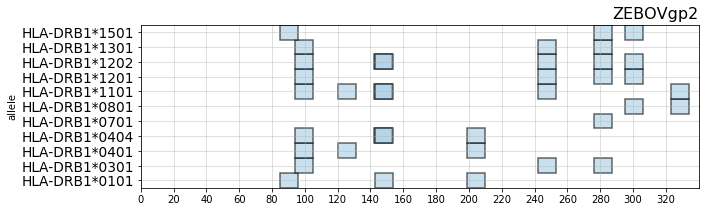

In [64]:
reload(base)
P=base.get_predictor('tepitope')
path='../zaire_test/tepitope/'
fname = '../zaire_test/tepitope/ZEBOVgp2.csv'
P.load(path=fname)

#b = P.get_binders(cutoff=.95, name='ZEBOVgp2')
b = P.get_binders(cutoff=.95, cutoff_method='default')
x=P.promiscuous_binders(b, n=2)
print x

plotting.plot_tracks([P],name='ZEBOVgp2',cutoff=.95,n=2)


498
         allele  pos  start  end  length      peptide               method  percentile_rank  ann_ic50  ann_rank  \
1   HLA-A*01:01    1     65   75      11  NWMAQLGPWNY  Consensus (ann/smm)             2.00   2283.88       0.7   
0   HLA-A*01:01    1     66   76      11  WMAQLGPWNYA  Consensus (ann/smm)             1.90   7181.33       0.7   
2   HLA-A*01:01    1     45   55      11  LIWLMVFQLAA  Consensus (ann/smm)             2.40  13708.56       1.9   
3   HLA-A*01:01    1     47   57      11  WLMVFQLAAIG  Consensus (ann/smm)             7.30  21147.59       6.6   
4   HLA-A*01:01    1     44   54      11  GLIWLMVFQLA  Consensus (ann/smm)             8.35  24855.69      14.0   
5   HLA-A*01:01    1     41   51      11  MLIGLIWLMVF  Consensus (ann/smm)             9.15  20987.35       6.3   
6   HLA-A*01:01    1     42   52      11  LIGLIWLMVFQ  Consensus (ann/smm)            11.10  26368.89      17.0   
7   HLA-A*01:01    1     40   50      11  LMLIGLIWLMV  Consensus (ann/smm)  

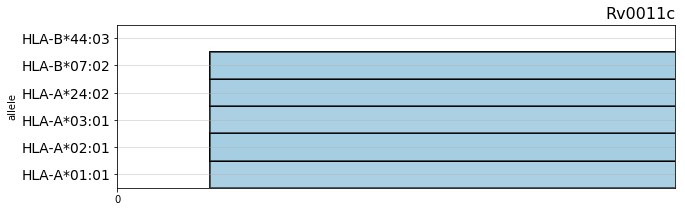

In [77]:
reload(base)
#check we can still get binders using path only
#p='tepitope'
p='iedbmhc1'
path='../mtb_results/%s/' %p
P=base.get_predictor(p)
fname = '../results/%s/Rv0011c.csv' %p
P.load(path=fname)
print len(P.data)
print P.data[:15]
b = P.get_binders(cutoff=.95)
x=P.promiscuous_binders(b, n=2)
print x

plotting.plot_tracks([P],name='Rv0011c',cutoff=.95,n=2)


In [ ]:
reload(base)
path='../zaire_test/tepitope/'
files = glob.glob(os.path.join(path, '*.csv'))
P=base.get_predictor('tepitope')
tempdata = base.results_from_csv(path, file_limit=100)
cuts = P.get_allele_cutoffs(tempdata, 5.0)

P=base.get_predictor('tepitope')
P.load(path=path)
res1 = P.get_binders(cutoff_method='score', cutoff=6  )
print res1[40:50]
P=base.get_predictor('tepitope')
res2 = P.get_binders(path=path, cutoff_method='score', cutoff=6 )
print res2[40:50]


In [76]:
def results_to_hdf(files):
    for f in files:
        df=pd.read_csv(f,index_col=0).reset_index()
        n=os.path.splitext(os.path.basename(f))[0]
        #print n
        df.to_hdf('test.hdf5', key='results', mode='a') 

#results_to_hdf(files[:1000])

df=pd.read_hdf('test.hdf5','results')
print len(df)

2607


In [27]:
reload(base)

path='../mtb_results'
name = 'Rv0019c'

def get_summary_tables(path, limit=None, **kwargs):
    """Get binder results summary for all proteins in path.
    Args:
        path: path to results
    """

    data = web.get_results_tables(path, view='promiscuous', **kwargs)
    for i in data:
        #seqs = web.get_sequences(P)
        print i
        x = data[i].groupby('name').agg({'peptide':np.size,'score':np.median}).reset_index()
        x = x.rename(columns={'peptide':'binders'})
        #x['binder_density'] = x.length/x.
        x = x.sort_values(by='binders',ascending=False)
        print x[:10]
    return data

d = get_summary_tables(path, n=3, cutoff=.95)



cached file found
cached file found
tepitope
         name  score  binders
188    Rv0194   4.75       78
2007  Rv2048c   4.85       76
977    Rv0987   4.80       69
3727  Rv3823c   5.20       67
196   Rv0202c   5.12       67
3807   Rv3910   4.76       66
500    Rv0507   5.10       63
3700   Rv3795   4.40       62
669   Rv0676c   5.05       62
95     Rv0101   4.60       60
mhcflurry
        name        score  binders
90    Rv0194  1125.729577        8
245  Rv1258c   570.995621        7
282  Rv2048c  1077.257869        6
113  Rv0236c   630.997108        5
457   Rv3158  1311.639817        5
456   Rv3157   540.972151        5
35    Rv0083   490.419022        5
47    Rv0102  1759.127012        5
21    Rv0051  1876.516231        5
98   Rv0206c   774.351574        5


In [42]:
reload(tepitope)
reload(base)
seqs = peptutils.create_random_sequences(500, length=11)
#for i in seqs[:100]:
#    print i

m2alleles = base.get_preset_alleles('mhc2_supertypes')
P = ep.get_predictor('tepitope')
#x1 = P.predict_peptides(seqs[:20], alleles=m2alleles)
x=P.predict_proteins(prots, alleles=m2alleles)
print x[:3]
#x2 = P._predict_peptides(seqs[:20], alleles=m2alleles)
#print len(x1), len(x2)
#print x1.equals(x2)


predictions done for 5 sequences in 8 alleles
        peptide       core  pos  score  name         allele  rank
0   MRRVILPTAPP  MRRVILPTA    0  -0.08     0  HLA-DRB1*0101   1.0
17  YPVRSNSTIAR  VRSNSTIAR   17  -0.16     0  HLA-DRB1*0101   2.0
18  PVRSNSTIARG  VRSNSTIAR   18  -0.16     0  HLA-DRB1*0101   2.0


In [ ]:
reload(base)
halleles=['HLA-A*23:01']
seqs = peptutils.create_random_sequences(10)
P = base.get_predictor('iedbmhc1')
print P.method
st=time.time()
df=sequtils.fasta_to_dataframe('Rv0011c.fa')
r=P.predict_sequences(df, alleles=halleles, show_cmd=True)
#P.predict_peptides(seqs, alleles=halleles, show_cmd=True, method='smm',cpus=4)
print time.time()-st
#print P.data

In [113]:
reload(base)
halleles=['HLA-A*02:07','HLA-A*01:01','HLA-B*02:01','HLA-C*02:02']
#seqs = peptutils.create_random_sequences(20)
P = base.get_predictor('netmhcpan')
#P.predict_peptides(seqs, alleles=halleles)
df=sequtils.fasta_to_dataframe('Rv0011c.fa')
r=P.predict_sequences(df, alleles=halleles, show_cmd=True)
#print P.data
print P.promiscuous_binders(cutoff=.95)
#benchmark_seqs(P, seqs, halleles)

netMHCpan -BA -f /tmp/tmp8Eakrg.pep -inptype 1 -a HLA-A02:07
netMHCpan -BA -f /tmp/tmpWjyIOT.pep -inptype 1 -a HLA-A01:01
netMHCpan -BA -f /tmp/tmpdiMav7.pep -inptype 1 -a HLA-B02:01
netMHCpan -BA -f /tmp/tmpTqd_5a.pep -inptype 1 -a HLA-C02:02
predictions done for 1 sequences in 4 alleles
        peptide  pos                      name  alleles    score      mean  median_rank       core
10  IAFAFMITGLL   76  NC_000962.3:c13995-13714        2   7105.3  13083.45          9.0  IAFAFMITL
6   FTVSAVSRTPM   11  NC_000962.3:c13995-13714        1   1275.0   1275.00          1.0  FTVSAVSPM
18  SLFIGLMLIGL   34  NC_000962.3:c13995-13714        1   7135.8   7135.80          1.0  SLFIGLMGL
17  NWMAQLGPWNY   64  NC_000962.3:c13995-13714        1   8165.8   8165.80          1.0  WMAQGPWNY
7   FVSLFIGLMLI   32  NC_000962.3:c13995-13714        1   7562.5   7562.50          2.0  FLFIGLMLI
9   GLMLIGLIWLM   38  NC_000962.3:c13995-13714        1   8355.4   8355.40          3.0  GLMGLIWLM
0   AAIGSQAPTAL  

In [ ]:
reload(base)
halleles=['HLA-A*02:07']
#seqs = peptutils.create_random_sequences(500)
P = base.get_predictor('mhcflurry')
res1=P.predict_peptides(seqs, alleles=halleles)
#P.predictProteins(prots, alleles=halleles)

#benchmark_seqs(P, seqs, halleles)

In [ ]:
reload(base)
#seqs = peptutils.create_random_sequences(500)
P=base.get_predictor('mhcnuggets')
P.path = '/local/mhcnuggets'
res2=P.predict_peptides(seqs, alleles=halleles, show_cmd=True)
print len(res2)
#benchmark_seqs(P, seqs, halleles)

In [ ]:
reload(base)
def compare_predictors(p1, p2, allele, n=20, cpus=1, **kwargs):
    seqs = peptutils.create_random_sequences(n)
    P1 = ep.get_predictor(p1)
    P2 = ep.get_predictor(p2)
    res1=P1.predict_peptides(seqs, alleles=allele, cpus=cpus)   
    res2=P2.predict_peptides(seqs, alleles=allele, cpus=cpus, **kwargs)    
    x=res1.merge(res2,on='peptide')
    f,ax=plt.subplots(1,2,figsize=(12,5))
    ax=ax.flat
    x.plot(P1.scorekey,P2.scorekey,kind='scatter',c='black',alpha=.7,ax=ax[0])
    ax[0].set_xlabel(P1.name)
    ax[0].set_ylabel(P2.name)
    b1=P1.get_binders()#cutoff_method='score', cutoff=500)
    b2=P2.get_binders()#cutoff_method='score', cutoff=500)
    f = utilities.venndiagram([b1.peptide, b2.peptide],[P1.name,P2.name],colors=('y','b'),ax=ax[1])
    return 

compare_predictors('mhcflurry', 'mhcnuggets', 'HLA-A*30:02', 100, cpus=1)

In [ ]:
#df = pd.pivot_table(P.data, index='allele',values='score',columns=['pos','peptide'])
#sns.heatmap(df)

In [5]:
from bokeh.plotting import figure, show
from bokeh.io import  output_notebook

In [6]:
output_notebook()

Loading BokehJS ...

In [10]:
preds=['tepitope','netmhciipan','mhcflurry']
for p in preds[:1]:
    P=base.get_predictor(p)    
    fname = '../mtb_results/%s/Rv0011c.csv' %p
    P.load(path=fname)        
    d=P.data
    b=P.get_binders(cutoff=.96)
       
    #pl=bokeh_plot_grid(P,name='Rv0019c',palette='Blues',width=800, cutoff=.95) 
    #show(pl)

In [ ]:
def get_bokeh_colors(palette='Set1'):

    from bokeh.palettes import brewer
    n = len(base.predictors)
    pal = brewer[palette][n]
    i=0
    clrs={}
    for m in base.predictors:
        clrs[m] = pal[i]
        i+=1
    return clrs


def bokeh_summary_plot(df, savepath=None):
    """Summary plot"""

    from bokeh.plotting import figure
    from bokeh.layouts import column
    from bokeh.models import ColumnDataSource,Range1d,HoverTool,TapTool,CustomJS,OpenURL

    TOOLS = "pan,wheel_zoom,hover,tap,reset,save"

    colors = get_bokeh_colors()
    df=df.rename(columns={'level_0':'predictor'})
    df['color'] = [colors[x] for x in df['predictor']]
    p = figure(title = "Summary", tools=TOOLS, width=500, height=500)
    p.xaxis.axis_label = 'binder_density'
    p.yaxis.axis_label = 'binders'

    #make metric for point sizes
    #df['point_size'] = df.binder_density
    source = ColumnDataSource(data=df)
    
    p.circle(x='binder_density', y='binders', line_color='black', fill_color='color',
             fill_alpha=0.4, size=10, source=source, legend='predictor')
    hover = p.select(dict(type=HoverTool))
    hover.tooltips = OrderedDict([
        ("name", "@name"),       
        ("length", "@length"), 
        ("binders", "@binders"),
        ("binder_density", "@binder_density"),
        ("top_peptide", "@top_peptide"), 
        ("max_score", "@max_score"),        
    ])
    p.toolbar.logo = None
    if savepath != None:
        url = "http://localhost:8000/sequence?savepath=%s&name=@name" %savepath
        taptool = p.select(type=TapTool)
        taptool.callback = OpenURL(url=url)
    
    callback = CustomJS(args=dict(source=source), code="""
        var data = source.data;
        var f = cb_obj.value

        data['x'] = f
        source.trigger('change');
        source.change.emit();
    """)

    from bokeh.layouts import widgetbox
    from bokeh.models.widgets import Select
    menu = [(i,i) for i in df.columns]
    select = Select(title='X', value='A', options=list(df.columns), width=8)
    select.js_on_change('value', callback)
    
    #layout = column(p, select, sizing_mode='scale_width')
    return p

reload(web)
data = web.get_summary_tables('../listeria')
df = pd.concat(data).reset_index()

p=bokeh_summary_plot(df, 'listeria')
show(p)


In [8]:
def bokeh_summary2(df, savepath=None):
    """Summary plot"""

    from bokeh.plotting import figure
    from bokeh.layouts import column
    from bokeh.models import ColumnDataSource,Range1d,HoverTool,TapTool,CustomJS,OpenURL

    TOOLS = "pan,wheel_zoom,hover,tap,reset,save"
    p = figure(title = "Summary", tools=TOOLS, width=400, height=300)
    source = ColumnDataSource(data=df)    
    hist, edges = np.histogram(df.binders, density=True, bins=50)
    print hist    
    p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
        fill_color="#036564", line_color="#033649")
    
    return p

data = web.get_summary_tables('../listeria')
df = pd.concat(data).reset_index()
print df.columns
p=bokeh_summary2(df)
show(p)

Index([u'level_0', u'level_1', u'name', u'max_score', u'top_peptide', u'binders', u'clusters', u'locus_tag',
       u'translation', u'description', u'type', u'length', u'binder_density'],
      dtype='object')
[4.37186576 0.         0.         0.         0.         0.
 0.         1.60730359 0.         0.         0.         0.
 0.         0.         0.73293044 0.         0.         0.
 0.         0.         0.         0.20573486 0.         0.
 0.         0.         0.         0.         0.14144272 0.
 0.         0.         0.         0.         0.         0.05143371
 0.         0.         0.         0.         0.         0.
 0.02571686 0.         0.         0.         0.         0.
 0.         0.00642921]


### getting peptides from clusters - standardise and add to workflow

In [98]:
reload(analysis)
P=base.get_predictor(p)    
path = '../listeria/tepitope/'
path = '../zaire_test/tepitope/'
P.load(path) 
pb = P.promiscuous_binders(n=3,cutoff=.98)

#print cl
genome = sequtils.genbank_to_dataframe('../epitopepredict/testing/zaire-ebolavirus.gb',cds=True)

#cl = analysis.find_clusters(pb)
x = analysis.get_nmer(pb, genome, how='split', length=20)
x=analysis.peptide_properties(x, 'n-mer')
print x[:2]

       peptide  pos      name  alleles  score      mean  median_rank       core locus_tag gene  start  end  \
0  CRFNTTLISKI  245  ZEBOVgp7        9   7.20  5.041358          1.0  CRFNTTLIS  ZEBOVgp7    L    245  256   
1  FRLMRTNFLIK  200  ZEBOVgp1        9   7.52  4.584448          7.0  FRLMRTNFL  ZEBOVgp1   NP    200  211   

                  n-mer  hydro  net_charge  
0  KDLITCRFNTTLISKIAEIE   0.40           0  
1  HMMVIFRLMRTNFLIKFLLI   0.55           3  


In [ ]:
xcl=[]
for c in np.arange(.93,.99,.01):
    pb = P.promiscuous_binders(n=2,cutoff=c)
    cl = analysis.find_clusters(pb)
    xcl.append((c,len(cl)))
    
plt.plot(*zip(*xcl))